In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
factor_pricing = pd.read_csv("factor_pricing.csv")
portfolios = pd.read_csv("portfolios_excess_returns.csv")
rfr = pd.read_csv("risk_free_rate.csv")

In [17]:
factor_pricing

,Date,MKT,SMB,HML,RMW,CMA,UMD
0,1980-01-31 00:00:00,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1,1980-02-29 00:00:00,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
2,1980-03-31 00:00:00,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
3,1980-04-30 00:00:00,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
4,1980-05-31 00:00:00,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...,...
527,2023-12-31 00:00:00,0.0487,0.0732,0.0493,-0.0307,0.0132,-0.0551
528,2024-01-31 00:00:00,0.0070,-0.0574,-0.0238,0.0069,-0.0096,0.0511
529,2024-02-29 00:00:00,0.0506,-0.0078,-0.0349,-0.0199,-0.0214,0.0499
530,2024-03-31 00:00:00,0.0283,-0.0116,0.0419,0.0150,0.0117,-0.0041


In [18]:
factor_pricing['Date'] = pd.to_datetime(factor_pricing['Date'])
factor_pricing.set_index('Date', inplace=True)

In [19]:
factor_pricing

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...
2023-12-31,0.0487,0.0732,0.0493,-0.0307,0.0132,-0.0551
2024-01-31,0.0070,-0.0574,-0.0238,0.0069,-0.0096,0.0511
2024-02-29,0.0506,-0.0078,-0.0349,-0.0199,-0.0214,0.0499


<span style="font-size:20px; font-weight:bold;">Part 2: Pricing Factors and Assets</span>
<br> **Question 1**

In [22]:
#mean 
mean = factor_pricing.mean()
mean

MKT    0.007056
SMB    0.000683
HML    0.002169
RMW    0.003857
CMA    0.002553
UMD    0.005217
dtype: float64

In [23]:
#volatility 
volatility = factor_pricing.std()
volatility

MKT    0.045426
SMB    0.029195
HML    0.031721
RMW    0.024085
CMA    0.021092
UMD    0.044718
dtype: float64

In [24]:
#sharpe ratio 
rfr

,Date,RF
0,1980-01-31 00:00:00,0.0080
1,1980-02-29 00:00:00,0.0089
2,1980-03-31 00:00:00,0.0121
3,1980-04-30 00:00:00,0.0126
4,1980-05-31 00:00:00,0.0081
...,...,...
527,2023-12-31 00:00:00,0.0043
528,2024-01-31 00:00:00,0.0047
529,2024-02-29 00:00:00,0.0042
530,2024-03-31 00:00:00,0.0043


In [27]:
rfr["Date"] = pd.to_datetime(rfr["Date"])
rfr.set_index("Date", inplace = True)
rfr

,RF
Date,
1980-01-31,0.0080
1980-02-29,0.0089
1980-03-31,0.0121
1980-04-30,0.0126
1980-05-31,0.0081
...,...
2023-12-31,0.0043
2024-01-31,0.0047
2024-02-29,0.0042


In [28]:
merged = pd.merge (factor_pricing, rfr, on="Date")
merged

,MKT,SMB,HML,RMW,CMA,UMD,RF
Date,,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755,0.0080
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788,0.0089
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955,0.0121
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043,0.0126
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112,0.0081
...,...,...,...,...,...,...,...
2023-12-31,0.0487,0.0732,0.0493,-0.0307,0.0132,-0.0551,0.0043
2024-01-31,0.0070,-0.0574,-0.0238,0.0069,-0.0096,0.0511,0.0047
2024-02-29,0.0506,-0.0078,-0.0349,-0.0199,-0.0214,0.0499,0.0042


In [41]:
sharpe_ratios = {}
mean_excesses = {}
for column in merged.columns:
    if column != "RF":
        excess_return = merged[column] - merged["RF"]
        mean_excess = excess_return.mean()
        std_excess = excess_return.std()
        sharpe_ratios[column] = mean_excess / std_excess
        mean_excesses [column] = mean_excess

sharpe_ratios

{'MKT': 0.08259187308314275,
 'SMB': -0.08803303613646457,
 'HML': -0.03513114665395852,
 'RMW': 0.023809642371757207,
 'CMA': -0.034373782256473376,
 'UMD': 0.04339558915750854}

In [43]:
#VaR(.05)
VaR_05 = {}
for column in merged.columns:
    if column != "RF":
        excess_return = merged[column] - merged["RF"]
        VaR_05[column] = excess_return.quantile(0.05)
VaR_05

{'MKT': -0.07879,
 'SMB': -0.0453,
 'HML': -0.046605,
 'RMW': -0.03272,
 'CMA': -0.031709999999999995,
 'UMD': -0.072835}

In [44]:
#Does each factor have a positive expected excess return (premium)?
mean_excesses

{'MKT': 0.003774812030075188,
 'SMB': -0.0025984962406015045,
 'HML': -0.0011124060150375938,
 'RMW': 0.0005763157894736842,
 'CMA': -0.0007283834586466164,
 'UMD': 0.0019362781954887218}

From the above, we see that only 'MKT', 'RMW', and 'UMD' have a premium (market, robust minus weak, and the momentum factor)

**Question 2**

In [45]:
corr = merged[["MKT","SMB","HML"]].corr()
print(corr)

          MKT       SMB       HML
MKT  1.000000  0.231415 -0.204514
SMB  0.231415  1.000000 -0.042552
HML -0.204514 -0.042552  1.000000


It can be seen from above that the correlation between factors are quite low, whihc indicates that they are able to capture different dimensions of risk and return without much overlap.

**Question 3**

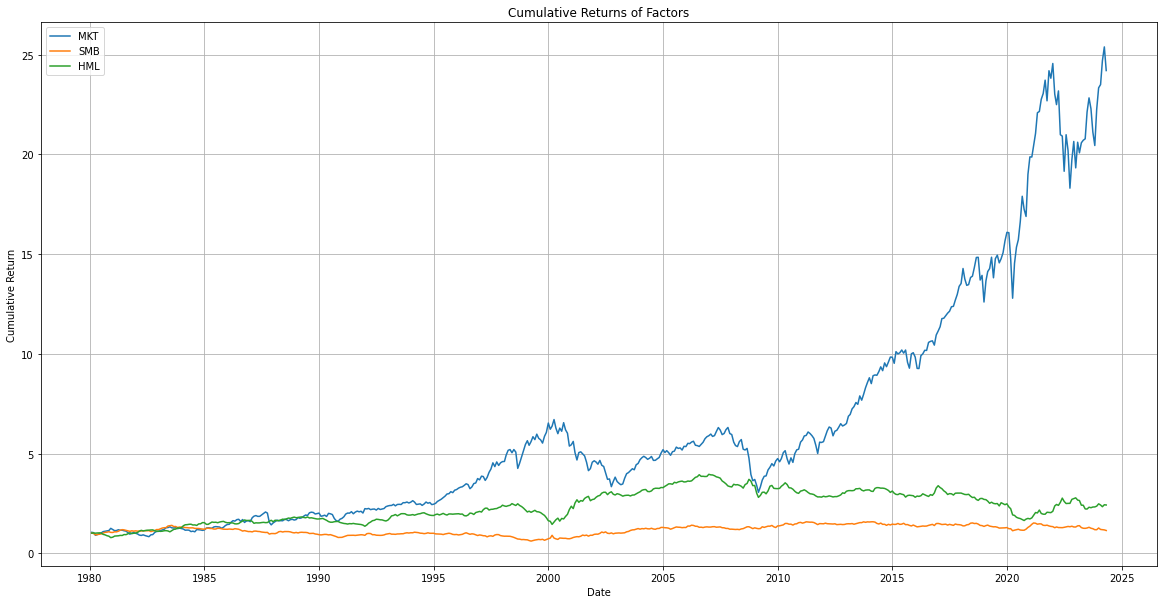

In [57]:
#consulted gpt for figure formatting
cum_returns = (1+merged[["MKT","SMB","HML"]]).cumprod()

plt.figure(figsize = (20,10))
plt.plot(cum_returns)
plt.legend(cum_returns.columns)
plt.title("Cumulative Returns of Factors")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

In [59]:
excess_returns

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1980-01-31 00:00:00,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1,1980-02-29 00:00:00,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
2,1980-03-31 00:00:00,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
3,1980-04-30 00:00:00,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
4,1980-05-31 00:00:00,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2023-12-31 00:00:00,0.0629,0.0390,0.0183,0.0012,0.0048,0.0972,0.0355,0.0836,-0.0011,...,0.0313,0.0687,0.0420,0.0595,0.0463,0.0925,-0.0101,0.1702,0.0968,0.0103
528,2024-01-31 00:00:00,-0.0500,-0.0201,-0.0119,-0.0129,-0.0298,-0.0610,0.0742,-0.0088,0.0330,...,-0.0167,-0.0203,0.0247,0.0092,0.0015,0.0109,0.0125,-0.0555,-0.0259,0.0408
529,2024-02-29 00:00:00,0.1574,-0.0134,0.0390,-0.0032,-0.0042,0.0328,0.0602,0.0107,0.0258,...,0.0521,0.0807,0.0530,0.1040,0.0504,0.0362,0.0160,0.0425,0.0438,0.0667
530,2024-03-31 00:00:00,0.0737,0.0347,0.0156,0.0418,0.0473,0.0171,0.0063,-0.0088,0.0268,...,0.0574,0.0017,0.0398,0.0222,0.0045,0.0495,0.0359,0.0240,0.0429,0.0370


**Question 4**

In [61]:
portfolios

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1980-01-31 00:00:00,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1,1980-02-29 00:00:00,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
2,1980-03-31 00:00:00,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
3,1980-04-30 00:00:00,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
4,1980-05-31 00:00:00,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2023-12-31 00:00:00,0.0629,0.0390,0.0183,0.0012,0.0048,0.0972,0.0355,0.0836,-0.0011,...,0.0313,0.0687,0.0420,0.0595,0.0463,0.0925,-0.0101,0.1702,0.0968,0.0103
528,2024-01-31 00:00:00,-0.0500,-0.0201,-0.0119,-0.0129,-0.0298,-0.0610,0.0742,-0.0088,0.0330,...,-0.0167,-0.0203,0.0247,0.0092,0.0015,0.0109,0.0125,-0.0555,-0.0259,0.0408
529,2024-02-29 00:00:00,0.1574,-0.0134,0.0390,-0.0032,-0.0042,0.0328,0.0602,0.0107,0.0258,...,0.0521,0.0807,0.0530,0.1040,0.0504,0.0362,0.0160,0.0425,0.0438,0.0667
530,2024-03-31 00:00:00,0.0737,0.0347,0.0156,0.0418,0.0473,0.0171,0.0063,-0.0088,0.0268,...,0.0574,0.0017,0.0398,0.0222,0.0045,0.0495,0.0359,0.0240,0.0429,0.0370


In [62]:
portfolios["Date"] = pd.to_datetime(portfolios["Date"])
portfolios.set_index("Date", inplace = True)
portfolios

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,0.0629,0.0390,0.0183,0.0012,0.0048,0.0972,0.0355,0.0836,-0.0011,0.0419,...,0.0313,0.0687,0.0420,0.0595,0.0463,0.0925,-0.0101,0.1702,0.0968,0.0103
2024-01-31,-0.0500,-0.0201,-0.0119,-0.0129,-0.0298,-0.0610,0.0742,-0.0088,0.0330,-0.0563,...,-0.0167,-0.0203,0.0247,0.0092,0.0015,0.0109,0.0125,-0.0555,-0.0259,0.0408
2024-02-29,0.1574,-0.0134,0.0390,-0.0032,-0.0042,0.0328,0.0602,0.0107,0.0258,0.0556,...,0.0521,0.0807,0.0530,0.1040,0.0504,0.0362,0.0160,0.0425,0.0438,0.0667


In [63]:
#mean 
mean_mon = portfolios.mean()
mean_ann = mean_mon *12
mean_ann

Agric    0.088320
Food     0.096198
Soda     0.106683
Beer     0.114760
Smoke    0.130013
Toys     0.058775
Fun      0.117142
Books    0.074017
Hshld    0.080384
Clths    0.094881
Hlth     0.078681
MedEq    0.099390
Drugs    0.101973
Chems    0.083826
Rubbr    0.097464
Txtls    0.080824
BldMt    0.101831
Cnstr    0.099880
Steel    0.071186
FabPr    0.057323
Mach     0.091570
ElcEq    0.106602
Autos    0.100574
Aero     0.103732
Ships    0.091762
Guns     0.109457
Gold     0.052218
Mines    0.087277
Coal     0.081268
Oil      0.088689
Util     0.074057
Telcm    0.069945
PerSv    0.063201
BusSv    0.088232
Hardw    0.088818
Softw    0.137256
Chips    0.121807
LabEq    0.099038
Paper    0.068271
Boxes    0.092601
Trans    0.088493
Whlsl    0.086461
Rtail    0.113120
Meals    0.102580
Banks    0.090645
Insur    0.096018
RlEst    0.045074
Fin      0.110693
Other    0.052980
dtype: float64

In [64]:
#volatility 
vol_mon = portfolios.std()
vol_ann = vol_mon *np.sqrt(12)
vol_ann

Agric    0.218354
Food     0.150865
Soda     0.220344
Beer     0.169987
Smoke    0.223101
Toys     0.249654
Fun      0.264903
Books    0.206644
Hshld    0.153582
Clths    0.224242
Hlth     0.233115
MedEq    0.180708
Drugs    0.162675
Chems    0.202541
Rubbr    0.207328
Txtls    0.277202
BldMt    0.224846
Cnstr    0.255913
Steel    0.292830
FabPr    0.278274
Mach     0.229823
ElcEq    0.230538
Autos    0.297231
Aero     0.227963
Ships    0.259866
Guns     0.217486
Gold     0.388254
Mines    0.277961
Coal     0.396761
Oil      0.225626
Util     0.138085
Telcm    0.173172
PerSv    0.211782
BusSv    0.189586
Hardw    0.257529
Softw    0.273267
Chips    0.264805
LabEq    0.231511
Paper    0.189411
Boxes    0.199138
Trans    0.201386
Whlsl    0.180272
Rtail    0.187374
Meals    0.181735
Banks    0.215036
Insur    0.180918
RlEst    0.251191
Fin      0.223460
Other    0.211046
dtype: float64

In [65]:
#sharpe
sharpe_ann = mean_ann / vol_ann
sharpe_ann

Agric    0.404478
Food     0.637646
Soda     0.484164
Beer     0.675113
Smoke    0.582752
Toys     0.235426
Fun      0.442207
Books    0.358184
Hshld    0.523397
Clths    0.423120
Hlth     0.337521
MedEq    0.550003
Drugs    0.626849
Chems    0.413873
Rubbr    0.470095
Txtls    0.291571
BldMt    0.452891
Cnstr    0.390287
Steel    0.243096
FabPr    0.205993
Mach     0.398437
ElcEq    0.462404
Autos    0.338371
Aero     0.455041
Ships    0.353112
Guns     0.503285
Gold     0.134494
Mines    0.313992
Coal     0.204830
Oil      0.393082
Util     0.536314
Telcm    0.403905
PerSv    0.298424
BusSv    0.465390
Hardw    0.344886
Softw    0.502276
Chips    0.459987
LabEq    0.427791
Paper    0.360442
Boxes    0.465007
Trans    0.439420
Whlsl    0.479614
Rtail    0.603713
Meals    0.564448
Banks    0.421534
Insur    0.530728
RlEst    0.179443
Fin      0.495361
Other    0.251037
dtype: float64

In [66]:
#VaR(.05)
var_05_mon = portfolios.quantile(0.05)
var_05_ann = var_05_mon * np.sqrt(12)
var_05_ann

Agric   -0.307352
Food    -0.205750
Soda    -0.327687
Beer    -0.234433
Smoke   -0.318628
Toys    -0.379527
Fun     -0.378869
Books   -0.294172
Hshld   -0.237378
Clths   -0.346895
Hlth    -0.349614
MedEq   -0.274755
Drugs   -0.249467
Chems   -0.283797
Rubbr   -0.309639
Txtls   -0.397973
BldMt   -0.298051
Cnstr   -0.357634
Steel   -0.423053
FabPr   -0.441742
Mach    -0.344297
ElcEq   -0.351502
Autos   -0.394353
Aero    -0.330527
Ships   -0.353997
Guns    -0.329107
Gold    -0.594925
Mines   -0.390006
Coal    -0.575716
Oil     -0.340088
Util    -0.217476
Telcm   -0.289911
PerSv   -0.323807
BusSv   -0.276539
Hardw   -0.367264
Softw   -0.376565
Chips   -0.364874
LabEq   -0.343483
Paper   -0.279622
Boxes   -0.305187
Trans   -0.303958
Whlsl   -0.268416
Rtail   -0.275431
Meals   -0.258162
Banks   -0.327410
Insur   -0.266182
RlEst   -0.360301
Fin     -0.362380
Other   -0.335585
Name: 0.05, dtype: float64

In [68]:
#put together
assets = pd.DataFrame({"Annualized Mean": mean_ann, 
                       "Annualized Volatility": vol_ann, "Sharpe Ratio": sharpe_ann, 
                       "VaR(.05)": var_05_ann})
assets

,Annualized Mean,Annualized Volatility,Sharpe Ratio,VaR(.05)
Agric,0.088320,0.218354,0.404478,-0.307352
Food,0.096198,0.150865,0.637646,-0.205750
Soda,0.106683,0.220344,0.484164,-0.327687
Beer,0.114760,0.169987,0.675113,-0.234433
Smoke,0.130013,0.223101,0.582752,-0.318628
Toys,0.058775,0.249654,0.235426,-0.379527
Fun,0.117142,0.264903,0.442207,-0.378869
Books,0.074017,0.206644,0.358184,-0.294172
Hshld,0.080384,0.153582,0.523397,-0.237378
Clths,0.094881,0.224242,0.423120,-0.346895


**Question 5**

In [71]:
corr_1 = assets["Annualized Mean"].corr(assets["Annualized Volatility"])
corr_1

-0.14702506349057978

In [74]:
corr_2 = assets["Annualized Mean"].corr(assets["VaR(.05)"])
corr_2

0.2431089441061125

As calculated above, the annualized mean excess returns shares a weak inverse relationship with annualized volatility and a weak positive relationship with the annualized VaR(.05). 
This suggests that neither statistics strongly explain the differences in mean excess returns of these portfolios.

<span style="font-size:20px; font-weight:bold;">Part 3: CAPM</span>
<br> **Question 1**

In [82]:
portfolios_12 = portfolios.iloc[:,:12]
portfolios_12

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,Hlth,MedEq
Date,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,0.0674,-0.0012
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,-0.0392,-0.0843
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,-0.0592,-0.0344
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,0.1099,0.0576
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,0.0265,0.0547
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,0.0629,0.0390,0.0183,0.0012,0.0048,0.0972,0.0355,0.0836,-0.0011,0.0419,0.0942,0.0696
2024-01-31,-0.0500,-0.0201,-0.0119,-0.0129,-0.0298,-0.0610,0.0742,-0.0088,0.0330,-0.0563,-0.0053,0.0371
2024-02-29,0.1574,-0.0134,0.0390,-0.0032,-0.0042,0.0328,0.0602,0.0107,0.0258,0.0556,0.0242,0.0229


In [76]:
merged

,MKT,SMB,HML,RMW,CMA,UMD,RF
Date,,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755,0.0080
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788,0.0089
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955,0.0121
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043,0.0126
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112,0.0081
...,...,...,...,...,...,...,...
2023-12-31,0.0487,0.0732,0.0493,-0.0307,0.0132,-0.0551,0.0043
2024-01-31,0.0070,-0.0574,-0.0238,0.0069,-0.0096,0.0511,0.0047
2024-02-29,0.0506,-0.0078,-0.0349,-0.0199,-0.0214,0.0499,0.0042


In [93]:
#consulted gpt for dataframe formatting and results error
import statsmodels.api as sm 
results = []
for asset in portfolios_12.columns:
    X = merged["MKT"]
    y = portfolios_12[asset]
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    results.append ({"alpha": model.params[0], "beta": model.params[1]
                     ,"mean_excess_return" : y.mean(), "error_term": model.resid.std()})

results_df = pd.DataFrame(results, index = portfolios_12.columns)
results_df

/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/3652589820.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append ({"alpha": model.params[0], "beta": model.params[1]
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/3652589820.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.append ({"alpha": model.params[0], "beta": model.params[1]
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/3652589820.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

,alpha,beta,mean_excess_return,error_term
Agric,0.001724,0.798755,0.007360,0.051543
Food,0.003897,0.583783,0.008017,0.034546
Soda,0.003909,0.705939,0.008890,0.054933
Beer,0.005138,0.627174,0.009563,0.039954
Smoke,0.006472,0.618298,0.010834,0.057957
Toys,-0.003006,1.120257,0.004898,0.051032
Fun,0.000563,1.303659,0.009762,0.048382
Books,-0.001322,1.061521,0.006168,0.035118
Hshld,0.001849,0.687313,0.006699,0.031477
Clths,0.000336,1.072981,0.007907,0.042599


**Question 2**

In [96]:
result = []
for asset in portfolios_12.columns:
    y = portfolios_12[asset]
    X = merged["MKT"]
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    treynor_ratio = y.mean()/model.params[1]
    information_ratio = model.params[0]/model.resid.std()
    result.append({"Alpha": model.params[0], "Beta": model.params[1],
                   "Treynor Ratio":treynor_ratio, "Information Ratio": information_ratio})

result_df = pd.DataFrame(result, index=portfolios_12.columns)
result_df

/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/3869722826.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  treynor_ratio = y.mean()/model.params[1]
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/3869722826.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  information_ratio = model.params[0]/model.resid.std()
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/3869722826.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

,Alpha,Beta,Treynor Ratio,Information Ratio
Agric,0.001724,0.798755,0.009214,0.033449
Food,0.003897,0.583783,0.013732,0.112819
Soda,0.003909,0.705939,0.012593,0.071164
Beer,0.005138,0.627174,0.015248,0.128602
Smoke,0.006472,0.618298,0.017523,0.111666
Toys,-0.003006,1.120257,0.004372,-0.058912
Fun,0.000563,1.303659,0.007488,0.011646
Books,-0.001322,1.061521,0.005811,-0.037640
Hshld,0.001849,0.687313,0.009746,0.058745
Clths,0.000336,1.072981,0.007369,0.007887


**Question 3**

If CAPM holds true, then the treynor ratios should be similar across the different assets. Additionally, the alphas should be close to zero and we would also expect to see the information ratios to be close to zero. 
<br>From our results, we see that the Treynor ratios don't appear to be consistent across the different assets which is a deviation from the expectations of CAPM. Further, we also see variations from the alphas and the Information ratios that are not all close to zero which indicate that there are abnormal returns that are not explained by the market beta as well as abnormal returns per unit of residual risk. 
<br>Overall, the results of this regression and the subsquently derived values seem to suggeset that CAPM does not hold in the case of these 12 test portfolios. 

**Question 4**

In [97]:
mae = result_df["Alpha"].abs().mean()
mae

0.0025373629817423064

This MAE of 0.0025 indicates that estimated alphas deviate from zero by 0.25% on average. A smaller deviation suggests a better support for the CAPM. The obtained value is small, but perhaps not negligible, implying that while the CAPM may explain quite a big portion of the returns, there are still abnormalities that the CAPM may not account for. 

<span style="font-size:20px; font-weight:bold;">Part 4: A Multifactor Model</span>
<br> **Question 1**

In [103]:
models = []
for asset in portfolios_12.columns:
    y = portfolios_12[asset]
    X = merged[["MKT", "SMB", "HML", "UMD"]]
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    models.append({"Alpha": model.params[0], "Beta_MKT": model.params[1], 
                  "Beta_SMB":model.params[2], "Beta_HML":model.params[3], 
                 "Beta_UMD": model.params[4], "R^2" :model.rsquared})
model_df = pd.DataFrame(models, index=portfolios_12.columns)

/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/1214018438.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models.append({"Alpha": model.params[0], "Beta_MKT": model.params[1],
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/1214018438.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Beta_SMB":model.params[2], "Beta_HML":model.params[3],
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_22311/1214018438.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

In [104]:
model_df

,Alpha,Beta_MKT,Beta_SMB,Beta_HML,Beta_UMD,R^2
Agric,0.000759,0.790637,0.317727,0.175051,0.081593,0.359935
Food,0.002600,0.666200,-0.237661,0.253031,0.063104,0.425322
Soda,0.003379,0.758158,-0.158705,0.277640,-0.063691,0.282455
Beer,0.003910,0.707222,-0.288234,0.121801,0.114189,0.377426
Smoke,0.005246,0.714011,-0.306653,0.351154,-0.000262,0.236922
Toys,-0.001937,1.030760,0.438444,0.002936,-0.142600,0.536379
Fun,0.002224,1.217643,0.286813,-0.026355,-0.228524,0.627993
Books,-0.001718,1.059391,0.210994,0.288065,-0.068616,0.692769
Hshld,0.001303,0.734891,-0.206657,0.073252,0.036824,0.516465
Clths,0.001110,1.034728,0.179452,0.130681,-0.174453,0.595241


**Question 2**

In [105]:
mae_alpha = model_df["Alpha"].abs().mean()
mae_alpha

0.0023067461364714736

Again, the MAE is not large but isn't too small that it's negligible which suggests that the factors do explain most of the returns but there are still abnormalities that are not explained by the model.